## Exercise 1

### a)

The posterior mean for a prior uniform distribution is: 5.636364
The posterior median is: 5.60609
The posterior variance is: 0.5123967

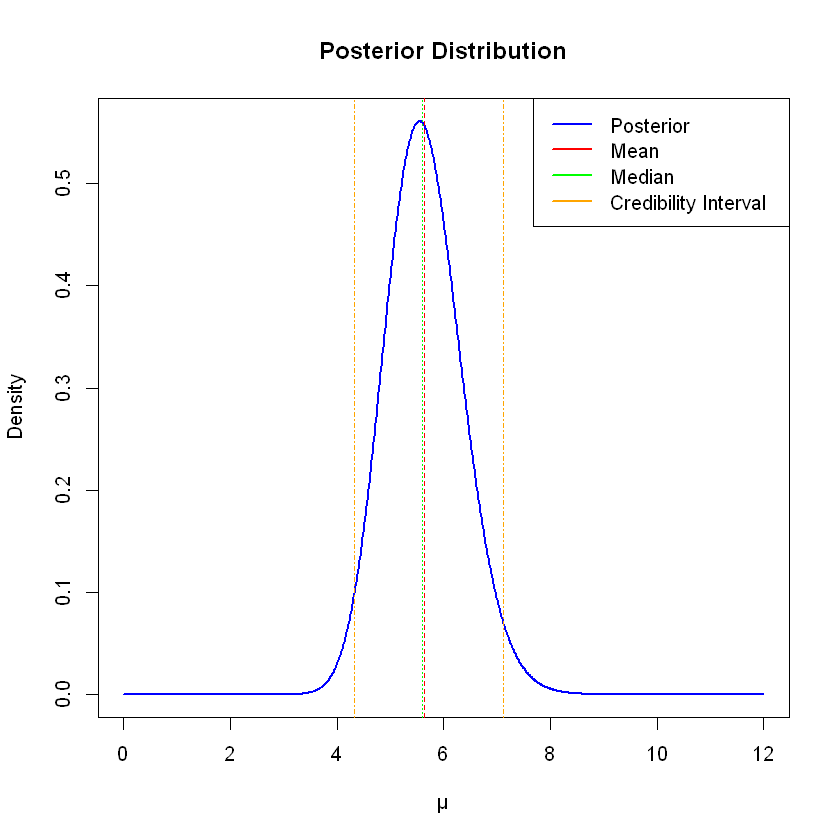

In [21]:
# Observed data
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- length(y)

# Prior: Uniform distribution
a <- 1
b <- 1
# Posterior distribution
a.post1 <- a + sum(y)
b.post1 <- b + n
# Posterior mean
mean.post1 <- a.post1 / b.post1
# Posterior median
median.post1 <- qgamma(0.5, shape = a.post1, rate = b.post1)
# Posterior variance
var.post1 <- a.post1 / (b.post1^2)
cat("The posterior mean for a prior uniform distribution is:", mean.post1)
cat("\nThe posterior median is:", median.post1)
cat("\nThe posterior variance is:", var.post1)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post1, rate = b.post1)
upper_bound <- qgamma(0.975, shape = a.post1, rate = b.post1)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post1, rate = b.post1)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post1, lty = 2, col = "red")
abline(v = median.post1, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topright", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### b)

The posterior mean for a Jeffrey's prior is: 8.375
The posterior median is: 8.34169
The posterior variance is: 0.8375

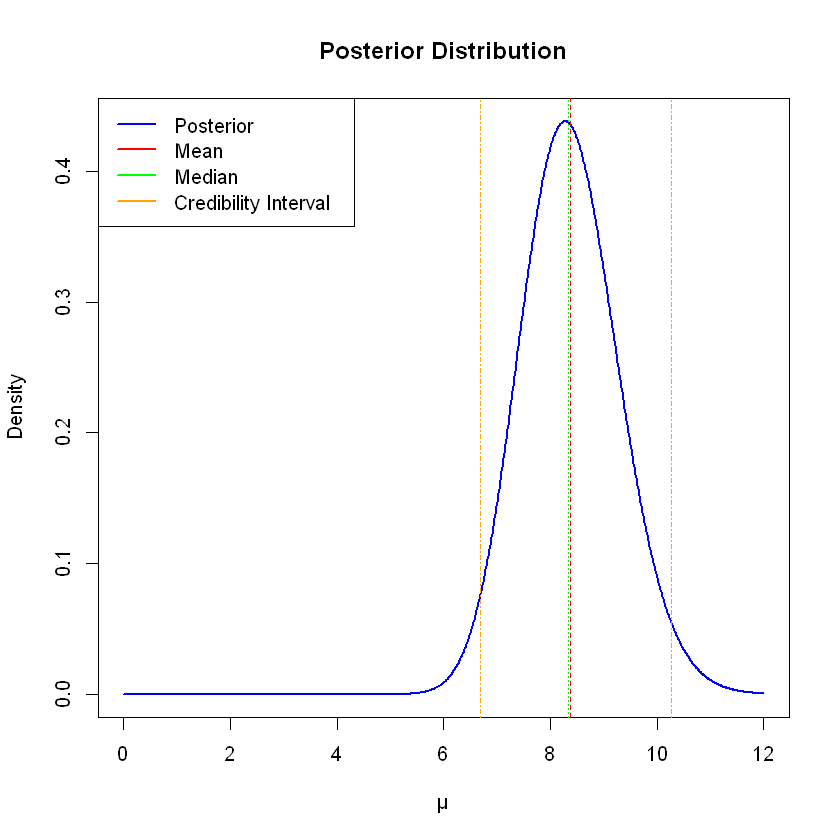

In [22]:
# Jeffreys' prior
a <- 0.5
b <- 0
# posterior distribution
a.post2 <- a + sum(y)
b.post2 <- b + n
# posterior mean
mean.post2 <- a.post2 / b.post2
# posterior median
median.post2 <- qgamma(0.5, shape = a.post2, rate = b.post2)
# posterior variance
var.post2 <- a.post2 / (b.post2^2)
cat("The posterior mean for a Jeffrey's prior is:", mean.post2)
cat("\nThe posterior median is:", median.post2)
cat("\nThe posterior variance is:", var.post2)

# Credibility interval
lower_bound <- qgamma(0.025, shape = a.post2, rate = b.post2)
upper_bound <- qgamma(0.975, shape = a.post2, rate = b.post2)

# Plot posterior distribution and credibility interval
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post2, rate = b.post2)
plot(x, y, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = mean.post2, lty = 2, col = "red")
abline(v = median.post2, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topleft", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

### c)

In [25]:
# 95% credibility interval for Uniform prior
ci.uniform <- qgamma(c(0.025,0.975), shape = a.post1, rate = b.post1)

# 95% credibility interval for Jeffrey's prior
ci.jeffreys <- qgamma(c(0.025,0.975), shape = a.post2, rate = b.post2)

# Normal approximation of posterior distribution
ci_unif_norm <- qnorm(c(0.025, 0.975), mean = mean.post1, sd = sqrt(var.post1))
ci_jeff_norm <- qnorm(c(0.025, 0.975), mean = mean.post2, sd = sqrt(var.post2))

cat("95% credibility interval using uniform prior:", ci.uniform, "\n")
cat("95% credibility interval using Jeffreys' prior:", ci.jeffreys, "\n")
cat("95% confidence interval using normal approximation (uniform prior):", ci_unif_norm, "\n")
cat("95% confidence interval using normal approximation (Jeffrey's prior):", ci_jeff_norm)

95% credibility interval using uniform prior: 4.321368 7.123368 
95% credibility interval using Jeffreys' prior: 6.677847 10.26142 
95% confidence interval using normal approximation (uniform prior): 4.233384 7.039343 
95% confidence interval using normal approximation (Jeffrey's prior): 6.581338 10.16866

## Exercise 2

### a)

Let `H` be the event of a patient having the disease, and `F` be the event of the new method failing to detect the disease. We know that `P(F|H) = 0.15`. Therefore, `P(D|H) = 0.85`, i.e., the probability of detecting the disease (event `D`) given that the patient has the disease.

A random sample of `n = 75` patients known to have the disease is screened using the new method. Let `Y` be the number of times the new method fails to detect the disease in this sample. Then `Y` has a **binomial** distribution with parameters `n = 75` and `p = 0.15`.

In [1]:
#number of trials
n <- 75
p <- 0.15
#number of failures
y <- 0:n
# probability distribution of failure
prob_y <- dbinom(y, size = n, prob = p)

### b)

If `y` is the number of patients in which the method fails to detect the disease and `n` is the total number of patients in the sample, then the frequentist estimator of the failure probability is given by:
$ \hat{p}=\frac{y}{n} $

In [2]:
y <- 6
# failure probability (frequentist estimator) 
p_hat <- y/n
cat("The frequentist estimation of the failure probability is:", p_hat*100, "%")

The frequentist estimation of the failure probability is: 8 %

### c)

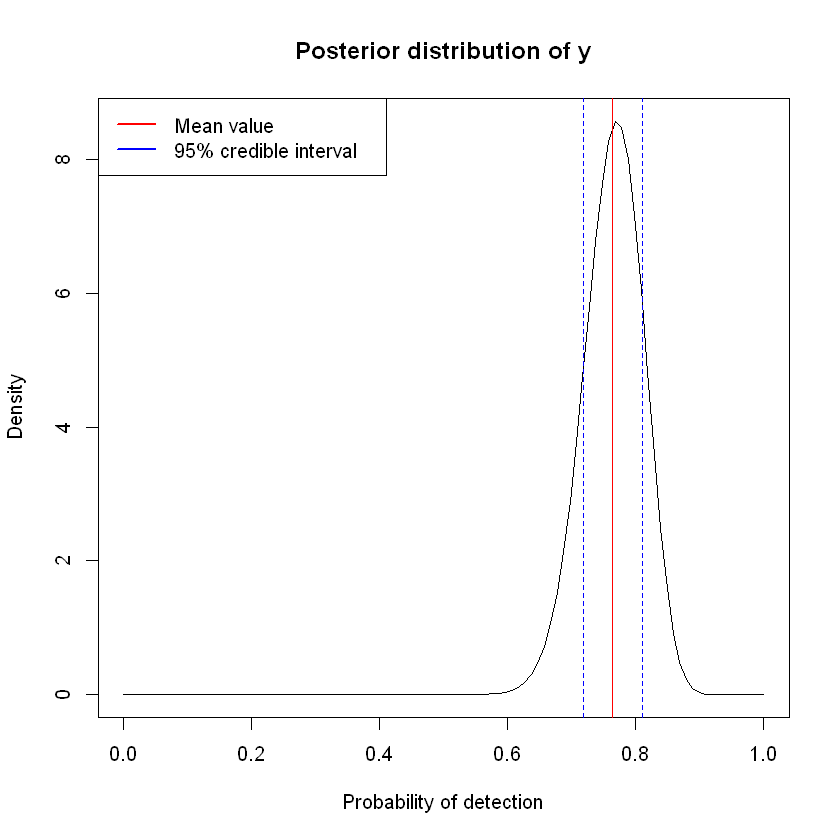

In [3]:
# Set the prior distribution parameters
alpha <- 0.15^2 / 0.14^2
beta <- alpha * (1 - 0.15) / 0.15

# Set the sample size and number of successes
n <- 75
y <- rbinom(1, n, 0.85)

# Compute the posterior distribution
posterior_alpha <- alpha + y
posterior_beta <- beta + n - y

# Compute the posterior mean and variance
posterior_mean <- posterior_alpha / (posterior_alpha + posterior_beta)
posterior_variance <- (posterior_alpha * posterior_beta) / ((posterior_alpha + posterior_beta)^2 * (posterior_alpha + posterior_beta + 1))

# Plot the posterior distribution
x <- seq(0, 1, length.out = 100)
posterior <- dbeta(x, posterior_alpha, posterior_beta)
plot(x, posterior, type = "l", xlab = "Probability of detection", ylab = "Density", main = "Posterior distribution of y")
abline(v = posterior_mean, col = "red")
abline(v = posterior_mean + sqrt(posterior_variance), col = "blue", lty = "dashed")
abline(v = posterior_mean - sqrt(posterior_variance), col = "blue", lty = "dashed")
legend("topleft", c("Mean value", "95% credible interval"),
       col = c("red", "blue"), lwd = 2)

### d)

We compare the posterior probabilities of two competing hypotheses:
<ol>
  <li> Null hypothesis (H0): The new screening method is no better than the traditional method, i.e., the probability of failing to detect the disease is greater than or equal to 15%.  </li>
  <li>Alternative hypothesis (HA): The new screening method is better than the traditional method, i.e., the probability of failing to detect the disease is less than 15%. </li>
</ol>

In [5]:
# Calculate the posterior probabilities of H0 and HA
p_H0 <- pbeta(0.15, posterior_alpha, posterior_beta)
p_HA <- pbeta(0.15, posterior_alpha, posterior_beta, lower.tail = TRUE)

# Compare the probabilities and make a decision
if (p_HA > p_H0) {
  cat("The new screening method is better than the traditional method.\n")
} else {
  cat("The new screening method is no better than the traditional method.\n")
}

The new screening method is no better than the traditional method.


Tenere questo sotto, I think.

In [7]:
# Calculate the posterior probability
posterior_prob <- pbeta(0.15, posterior_alpha, posterior_beta, lower.tail = FALSE)

# Perform the hypothesis test
if (posterior_prob <= 0.05) {
  cat("Reject the null hypothesis: The new test is better than the traditional method.\n")
} else {
  cat("Cannot reject the null hypothesis: The new test is no better than the traditional method.\n")
}

Cannot reject the null hypothesis: The new test is no better than the traditional method.


In [4]:
# Calculate the posterior probability of the null hypothesis being true given the data
p_null <- mean(posterior >= 0.15)

# Compare the posterior probability of the null hypothesis being true to the chosen level of significance
if (p_null < 0.05) {
  cat("We reject the null hypothesis at a 5% level of significance.")
} else {
  cat("We do not reject the null hypothesis at a 5% level of significance.")
}

We do not reject the null hypothesis at a 5% level of significance.

In [6]:
# Compute the marginal likelihoods of the null and alternative hypotheses
null_marginal <- pbeta(0.15, posterior_alpha, posterior_beta)
alt_marginal <- pbeta(0.15, alpha + y, beta + n - y)

# Compute the Bayes factor
bayes_factor <- null_marginal / alt_marginal

if (bayes_factor > 1/19) {
  cat("Null hypothesis not supported by data")
} else {
  cat("Null hypothesis supported by data")
}

Null hypothesis not supported by data

In [ ]:
# Define the null and alternative hypotheses
null_hypothesis <- function(p) {
  dbeta(p, posterior_alpha, posterior_beta) * (p >= 0 & p <= 0.15)
}

alternative_hypothesis <- function(p) {
  dbeta(p, posterior_alpha, posterior_beta) * (p >= 0.15 & p <= 1)
}

# Calculate the posterior probability of the null hypothesis
p_null <- integrate(null_hypothesis, 0, 1)$value

# Calculate the posterior probability of the alternative hypothesis
p_alternative <- integrate(alternative_hypothesis, 0, 1)$value

# Calculate the Bayes factor
bayes_factor <- p_alternative / p_null